In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,optimizers
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [46]:
data_dir = 'dataset'  # Replace with the path to your dataset folder
img_height, img_width = 150, 150   # Define target image dimensions
batch_size = 32                    # Define batch size
num_classes = 19                   # Number of folders (classes)
learning_rate = 0.001
dropout_rate = 0.5

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,             # Normalize pixel values
    validation_split=0.2           # Split 20% for validation
)

train = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'              # Set as training data
)

validation = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'            # Set as validation data
)


Found 23219 images belonging to 19 classes.
Found 5795 images belonging to 19 classes.


In [49]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(dropout_rate),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [60]:
epochs = 20  # You can increase the epochs for better results

history = model.fit(
    train,
    steps_per_epoch=64,
    validation_data=validation,
    validation_steps=64,
    epochs=epochs,
    callbacks=early_stopping
)


Epoch 1/20
64/64 [==============================] - 68s 1s/step - loss: 1.1819 - accuracy: 0.6260 - val_loss: 1.1298 - val_accuracy: 0.6577
Epoch 2/20
64/64 [==============================] - 61s 957ms/step - loss: 0.9455 - accuracy: 0.7026 - val_loss: 1.0665 - val_accuracy: 0.6577
Epoch 3/20
64/64 [==============================] - 59s 926ms/step - loss: 0.8129 - accuracy: 0.7329 - val_loss: 0.8481 - val_accuracy: 0.7173
Epoch 4/20
64/64 [==============================] - 60s 939ms/step - loss: 0.7624 - accuracy: 0.7559 - val_loss: 0.7672 - val_accuracy: 0.7578
Epoch 5/20
64/64 [==============================] - 59s 925ms/step - loss: 0.6710 - accuracy: 0.7861 - val_loss: 0.7988 - val_accuracy: 0.7461
Epoch 6/20
64/64 [==============================] - 60s 942ms/step - loss: 0.6186 - accuracy: 0.7988 - val_loss: 0.6235 - val_accuracy: 0.7910
Epoch 7/20
64/64 [==============================] - 59s 927ms/step - loss: 0.5673 - accuracy: 0.8135 - val_loss: 0.6192 - val_accuracy: 0.8008
Ep

In [61]:
val_loss, val_accuracy = model.evaluate(validation)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Classification Report
Y_pred = model.predict(validation)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(validation.classes, y_pred, target_names=validation.class_indices.keys()))


182/182 [==============================] - 40s 218ms/step - loss: 0.4872 - accuracy: 0.8385
Validation Accuracy: 83.85%
Classification Report
                                          precision    recall  f1-score   support

                   Cherry_Powdery_mildew       0.03      0.03      0.03       210
                          Cherry_healthy       0.03      0.03      0.03       210
                         Grape_Black_rot       0.03      0.03      0.03       236
              Grape_Esca_(Black_Measles)       0.04      0.03      0.04       276
Grape_Leaf_blight_(Isariopsis_Leaf_Spot)       0.05      0.05      0.05       215
                           Grape_healthy       0.03      0.02      0.02       135
           Pepper,_bell___Bacterial_spot       0.01      0.00      0.01       202
                  Pepper,_bell___healthy       0.05      0.05      0.05       318
                  Strawberry_Leaf_scorch       0.03      0.03      0.03       221
                      Strawberry_heal

In [63]:
# Save the trained model
#model.save('final_model.h5')
model.save('final_model.h5')
# To load the model



In [64]:
loaded_model = tf.keras.models.load_model('final_model.h5')

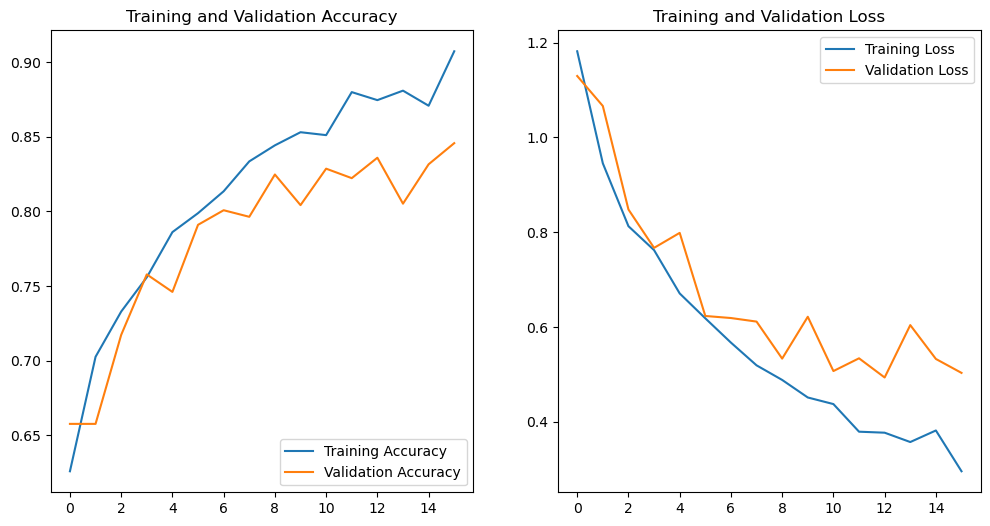

In [65]:
# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [66]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

img_path = 'car.jpg'
img_height, img_width = 224, 224  # Example target size
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = tf.expand_dims(img_array, 0)

predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_names = list(validation.class_indices.keys())

if 0 <= predicted_class < len(class_names):
    print("Predicted class:", class_names[predicted_class])
else:
    print("Apologies, I’m still in learning mode and don’t have information on that right now.")


Predicted class: Tomato_Early_blight
